<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Machine%20Learning/NLP/Analise_Sentimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 8> Processamento de Linguagem Natural (PLN)</font>

Referências:
Cursos Alura:
1. Linguagem Natural Parte1 : NLP com Análise de sentimento

## Importe Bibliotecas e Dados

In [ ]:
 import pandas as pd

resenha = pd.read_csv("https://media.githubusercontent.com/media/BrunoRaphaell/base-dados-imdb/master/imdb-reviews-pt-br.csv", sep = ',')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
resenha

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


## importando todas as bibliotecas usadas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(resenha.text_pt,
                                                        resenha.sentiment,
                                                        random_state = 42)

In [ ]:
'''
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_treino, y_treino)
regressao_logistica.score(x_teste, y_teste)'''

'\nregressao_logistica = LogisticRegression()\nregressao_logistica.fit(x_treino, y_treino)\nregressao_logistica.score(x_teste, y_teste)'

Fazer o treinamento do modelo deta forma resultará em erro, porque os modelos esperam valores numéricos e não textuais. Antes então de criar o modelo vamos trabalhar a PLN.

Primeiro vamos estudar um poucos dos texto com objetivo de compreender como são os textos que serão passados, buscar por detalhes que possam ajudar no momento de criar o modelo.

## Estudando os Dados
### Primeiro os Textos

Notei que as pessoas usam termos como pior, piores, lixo, ruim para fazer comentários negativos sobre os filmes. Enquanto usam brilhante, Uau, perfeito, para fazer comentários positivos.

Geralmente essas palavras estão ou no início ou no final do comentário, e não no meio.


In [ ]:
print("Negativo \n")
i = 20
print(resenha.sentiment[i])
print("----------------------")
print(resenha.text_pt[i])

Negativo 

neg
----------------------
A melhor coisa sobre "The Prey" é o slogan ... "Não é humano e tem um machado"! O filme em si é um stinkaroo acolchoado ... intermináveis ​​fotos de insetos e vida selvagem fazem o espectador querer morrer! Nenhum fã de slasher vai gostar desse lixo ..... Assista "Friday the 13th" novamente e grave qualquer cópia deste filme que você encontrar! Também é considerado um dos 25 piores filmes já feitos!


In [ ]:
print("Positivo \n")
i = 49003
print(resenha.sentiment[i])
print("----------------------")
print(resenha.text_pt[i])

Positivo 

pos
----------------------
Uau! Eu tenho visto tantos filmes ruins de baixo orçamento ultimamente, mas esse é ótimo. O retrato muito realista da vida policial em uma cidade na costa da Alemanha Oriental é um forte contraste com outros filmes de crime ou séries. Eu amava a atriz principal e a rejeição absoluta de qualquer clichê predominante sobre a polícia. Este filme é realista como uma documentação e divertido como um drama ao mesmo tempo. Uma troca perfeita!


### Dados Estatísticos

1. A quantidade de negativo e positivo é próxima, sendo assim possível treino modelo de forma equilibrada.
2. Trocar Neg e Pos por 0 e 1

In [ ]:
resenha.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [ ]:
classificacao = resenha['sentiment'].replace(["neg",'pos'], [0, 1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [ ]:
resenha['classificacao'] = classificacao

In [ ]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [ ]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


# Bag of Words

* **O que é?**

É uma representação em vetores das quantidade de palavras que formam uma frase. Para faze-la temos que conhecer todas as palavras e conta a quantidade de repetições de palavras por frases. A contagem de todas as palavras cria o vetor

In [ ]:
texto = ['Assisti um filme ótimo', 'Assisti um filme ruim']  # para exemplo

vetorizar = CountVectorizer(lowercase = False)
bag_of_words  = vetorizar.fit_transform(texto)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
list(vetorizar.get_feature_names_out())

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [ ]:
matriz_sparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns =vetorizar.get_feature_names_out())
matriz_sparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


1. **O uso do Max_features** faz com que delimitamos uma quantidade máxima de dimensões no vetor (quantidade de palavras no vocabulário). No entanto, a "escolha" das palavras é feita baseando em maior número de repetição.

In [ ]:
vetorizar = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words  = vetorizar.fit_transform( resenha.text_pt  )
print(bag_of_words.shape)

(49459, 50)


In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words,
                                                        resenha.classificacao,
                                                        random_state = 42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_treino, y_treino)
regressao_logistica.score(x_teste, y_teste)

0.6583097452486858

<font size = 5> Definimos então Baseline como: 0.66</font>

Vamos definir a função de classificação de texto

In [ ]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase = False, max_features = 50)
  bag_of_words  = vetorizar.fit_transform( texto[coluna_texto] )

  x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words,
                                                          texto[coluna_classificacao],
                                                          random_state = 42)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(x_treino, y_treino)
  acuracy = regressao_logistica.score(x_teste, y_teste)
  print(round(acuracy, 2))


In [ ]:
classificar_texto(resenha, "text_pt","classificacao")

0.66


## Criando representação visual das palavras existentes nos textos


* A ideia é ler os textos sem de fato ler os texto. Quero conhecer quais são as palavras que aparecem nos texto sem ter que ficar lendo cada um dos comentários. Com isso conhecer um pouco mais sobre como as pessoas escrevem seus comentários

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
todas_palavras = ' '.join([text for text in resenha.text_pt])


In [ ]:
len(todas_palavras)

63448424

In [ ]:
nuvem_palavras = WordCloud().generate(todas_palavras)

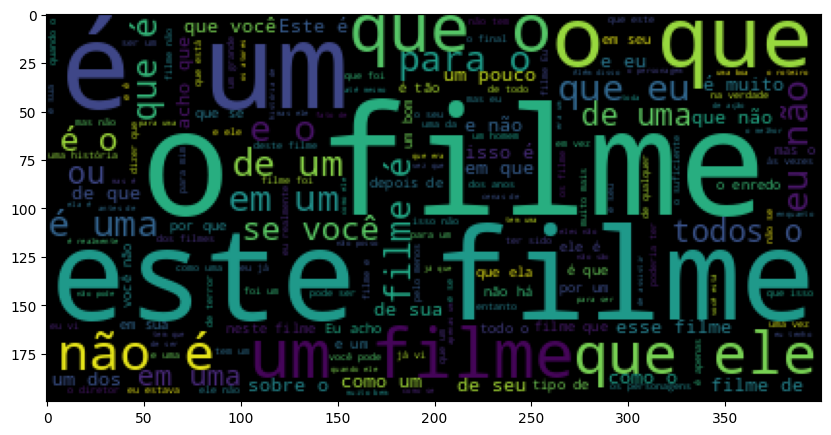

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.imshow(nuvem_palavras)
plt.show()

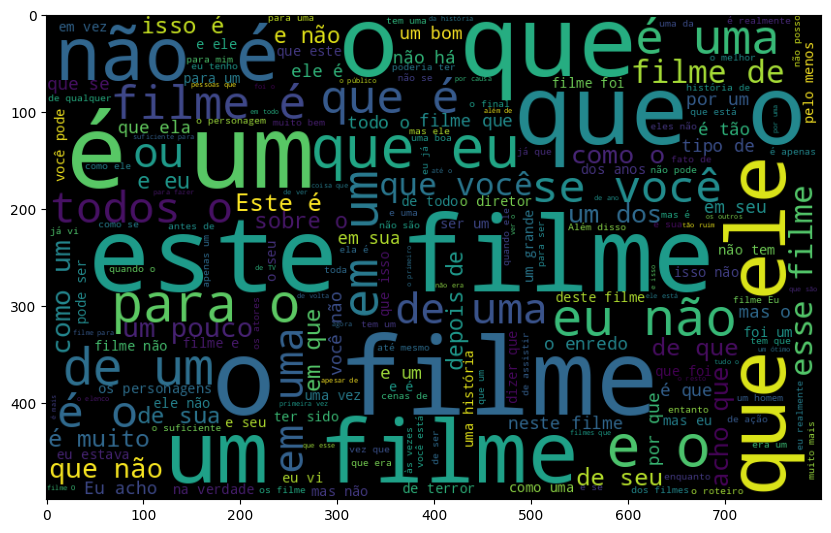

In [ ]:
nuvem_palavras = WordCloud(width = 800,
                           height = 500, max_font_size = 110).generate(todas_palavras)

plt.figure(figsize = (10,8))
plt.imshow(nuvem_palavras)
plt.show()

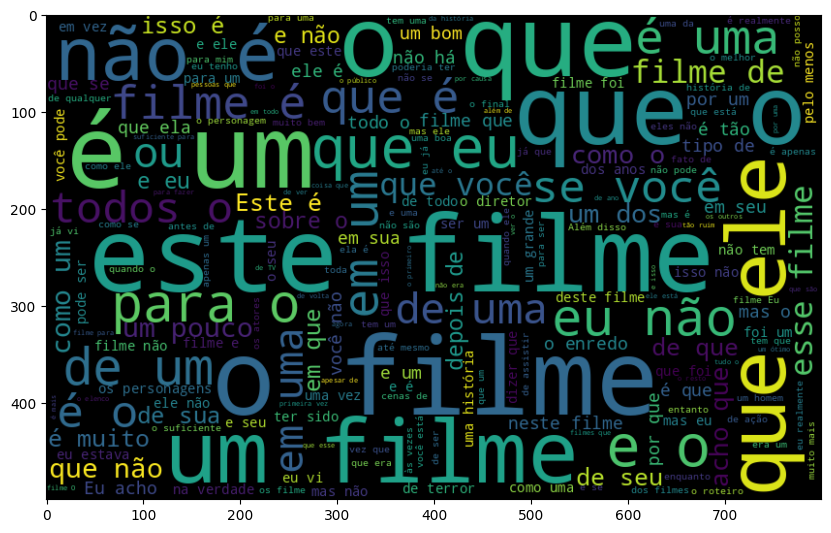

In [ ]:
plt.figure(figsize = (10,8))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.show()

In [ ]:
nuvem_palavras = WordCloud(width = 800,
                           height = 500, max_font_size = 110, collocations = False).generate(todas_palavras)

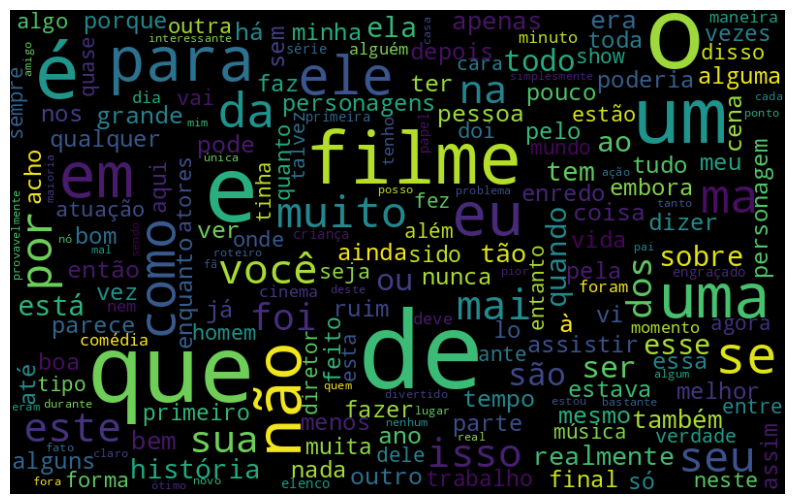

In [ ]:
plt.figure(figsize = (10,8))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

* Neste visualização estão os comentários positivos e negativos.
* É interessante fazer duas visualizações, uma para comentários positivos e outra para negativos

### Bag of Words para diferentes opiniões

In [ ]:
def word_cloud(palavras):
  nuvem_palavras = WordCloud(width = 800,
                           height = 500, max_font_size = 110, collocations = False).generate(palavras)

  plt.figure(figsize = (10,8))
  plt.imshow(nuvem_palavras, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()

In [ ]:
resenha.query("classificacao == 1"). text_pt

12389    Eu fui e vi este filme ontem à noite depois de...
12390    O diretor do ator, Bill Paxton, segue sua prom...
12391    Como um jogador de recreio com algum conhecime...
12392    Eu vi esse filme em uma prévia, e é delicioso....
12393    Bill Paxton levou a verdadeira história do gol...
                               ...                        
49454    Como a média de votos era muito baixa, e o fat...
49455    O enredo teve algumas reviravoltas infelizes e...
49456    Estou espantado com a forma como este filme e ...
49457    A Christmas Together realmente veio antes do m...
49458    O drama romântico da classe trabalhadora do di...
Name: text_pt, Length: 24694, dtype: object

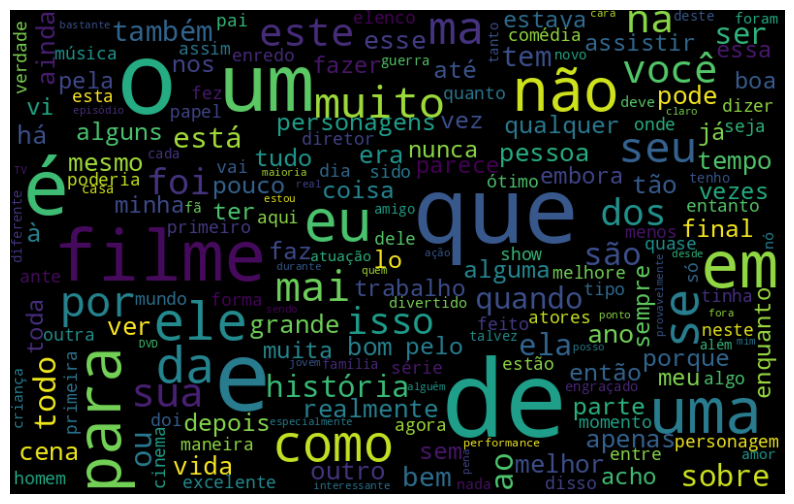

In [ ]:
palavras_pos = ' '.join([text for text in resenha.query("classificacao == 1"). text_pt])
word_cloud(palavras_pos)

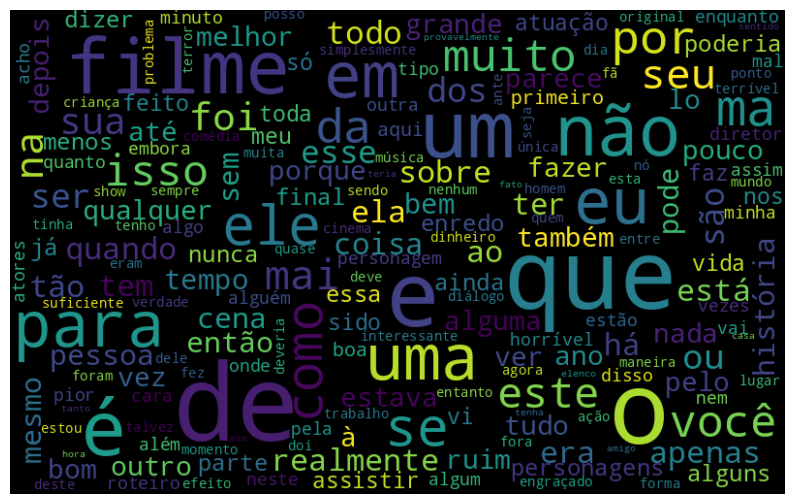

In [ ]:
palavras_neg = ' '.join([text for text in resenha.query("classificacao == 0"). text_pt])
word_cloud(palavras_neg)

## Biblioteca NLTK

1. Vamos criar tokens (cada palavra seria um token) para contar a frequência de cada palavra.

In [ ]:
import nltk

nltk.download("all")   # Pode rodar sem o all e tera que ir baixando em partes quando der erro

In [ ]:
from nltk import tokenize

In [ ]:
#Exemplo
frase = "Bem vindo ao mundo do PLN"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)

print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']


In [ ]:
#Fazendo com minhas palavras
token_palavras = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_palavras)
frequencia

In [ ]:
df_frequencia = pd.DataFrame({'Palavras':list(frequencia.keys()), 'Frequencia':list(frequencia.values())})
df_frequencia

,Palavras,Frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [ ]:
df_frequencia.nlargest(columns = 'Frequencia', n = 10)

,Palavras,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [ ]:
import seaborn as sns

In [ ]:
def pareto(texto, coluna_texto, quantidade):

  todas_palavras = ' '.join([text for text in texto[coluna_texto]])
  token_palavras = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_palavras)
  df_frequencia = pd.DataFrame({'Palavras':list(frequencia.keys()), 'Frequencia':list(frequencia.values())})


  plt.figure(figsize = (10, 8))

  ax = sns.barplot(data = df_frequencia.nlargest(columns = 'Frequencia', n = quantidade), x = 'Palavras', y = 'Frequencia', color = 'gray')
  ax.set(ylabel = 'Contagem')

  plt.show()

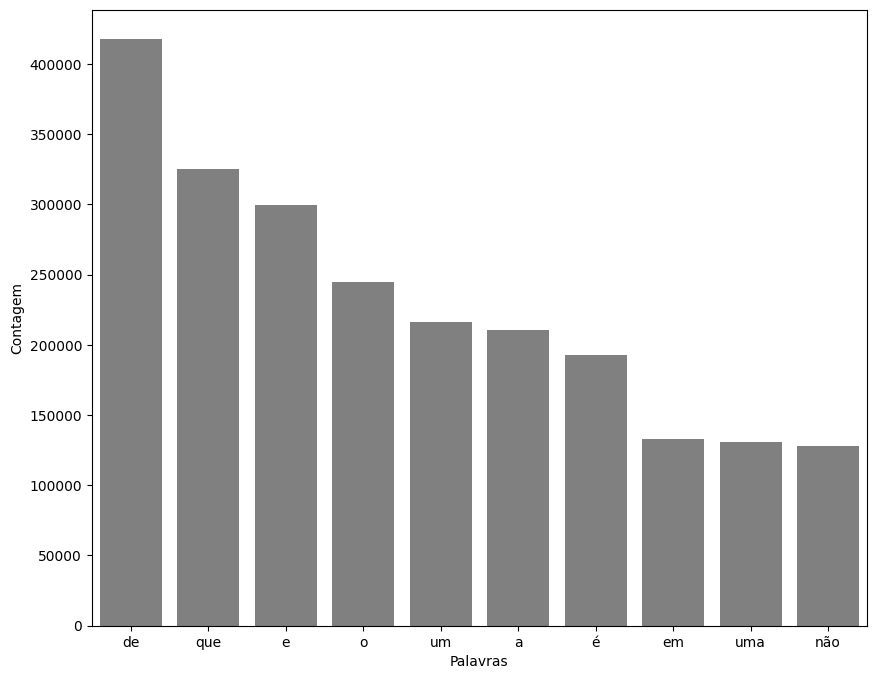

In [ ]:
pareto(resenha, 'text_pt', 10)

## StopWords
* São palavras que não agregam em semântica no texto, como preposições, artigos, afins. Por chamei de irrelevantes

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
print(palavras_irrelevantes)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [ ]:
frase_processada = list()

for opiniao in resenha.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)

  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)

  frase_processada.append(' '.join(nova_frase))


resenha['tratamento_1'] = frase_processada

In [ ]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [ ]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.68


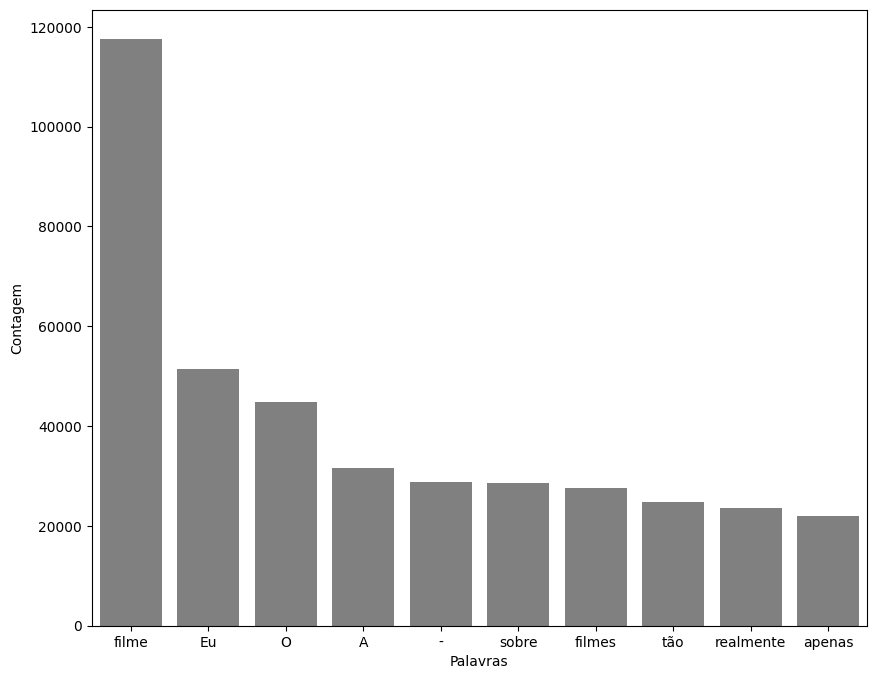

In [ ]:
pareto(resenha, 'tratamento_1', 10)